In [4]:
%load_ext watermark
import pickle
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

import sklearn.neighbors
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import umap
import umap.plot

In [2]:
#loading data
data = pd.read_pickle('df_features_test_env_labeled.pkl')
data

1         2    \
source sessionName         bluetoothName timestamp                           
test   2019-07-17-21-39-40 e1f1cd13f8d3  1563399610294  0.460556  0.513249   
                                         1563399625404  0.436985  0.478062   
                                         1563399640375  0.347814  0.434901   
                                         1563399655494  0.328468  0.399012   
                                         1563399670641  0.354713  0.398343   
...                                                          ...       ...   
       2019-07-23-23-10-19 00a3b4d873d2  1563939960098 -0.134379  0.045593   
                                         1563939975449 -0.105062  0.029853   
                                         1563939990803 -0.106811  0.054254   
                                         1563940006139 -0.130405  0.049978   
                                         1563940021516 -0.126138  0.038814   

                                                             3         4    \
source sessionName         bluetoothName timestamp                           
test   2019-07-17-21-39-40 e1f1cd13f8d3  1563399610294  0.390828  0.381178   
                                         1563399625404  0.353319  0.351178   
                                         1563399640375  0.290923  0.269869   
                                         1563399655494  0.271443  0.247693   
                                         1563399670641  0.294437  0.320615   
...                                                          ...       ...   
       2019-07-23-23-10-19 00a3b4d873d2  1563939960098  0.116363 -0.022073   
                                         1563939975449  0.114391  0.005028   
                                         1563939990803  0.110516  0.000089   
                                         1563940006139  0.114686 -0.019178   
                                         1563940021516  0.112827 -0.017315   

                                                             5         6    \
source sessionName         bluetoothName timestamp                           
test   2019-07-17-21-39-40 e1f1cd13f8d3  1563399610294  0.502600  0.522202   
                                         1563399625404  0.491252  0.513253   
                                         1563399640375  0.400352  0.419635   
                                         1563399655494  0.351665  0.375588   
                                         1563399670641  0.358388  0.346392   
...                                                          ...       ...   
       2019-07-23-23-10-19 00a3b4d873d2  1563939960098  0.025080  0.059341   
                                         1563939975449  0.038033  0.018341   
                                         1563939990803  0.042300  0.013170   
                                         1563940006139  0.026021  0.002048   
                                         1563940021516  0.002343 -0.022771   

                                                             7         8    \
source sessionName         bluetoothName timestamp                           
test   2019-07-17-21-39-40 e1f1cd13f8d3  1563399610294  0.589454  0.554135   
                                         1563399625404  0.506297  0.507987   
                                         1563399640375  0.402533  0.410813   
                                         1563399655494  0.377528  0.390332   
                                         1563399670641  0.363587  0.442665   
...                                                          ...       ...   
       2019-07-23-23-10-19 00a3b4d873d2  1563939960098  0.008995  0.029352   
                                         1563939975449  0.026851  0.019842   
                                         1563939990803  0.038175  0.017204   
                                         1563940006139  0.024917 -0.000363   
                                         1563940021516  0.008488 -0.011899   

 

In [ ]:
Ploting the data 

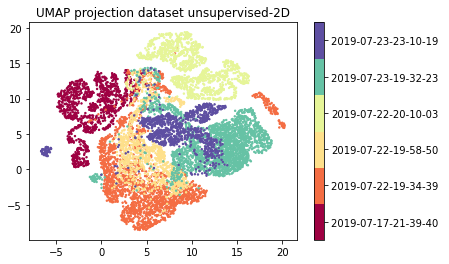

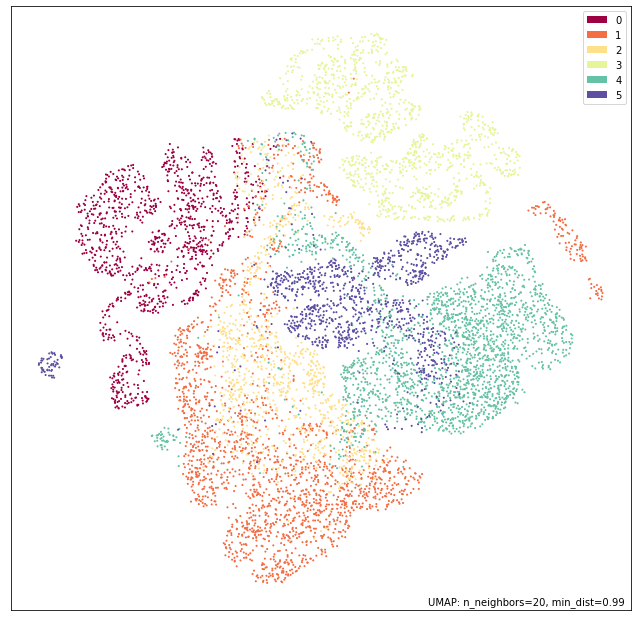

In [80]:
# UMAP 2D clustring unsupervised
x = data.axes
#print(x)
data1 = data.reset_index(level=['sessionName'])
classes = ['2019-07-17-21-39-40 ','2019-07-22-19-34-39 ','2019-07-22-19-58-50','2019-07-22-20-10-03','2019-07-23-19-32-23 ','2019-07-23-23-10-19 ']
label = pd.factorize(data1.sessionName)[0]


reducer = umap.UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=0.1,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.99, n_components=2, n_epochs=350,
     n_neighbors=20, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

#reducer.fit(data)
#embedding = reducer.transform(data)

scaled_data = StandardScaler().fit_transform(data)
embedding = reducer.fit_transform(scaled_data)

# Plot 1 - using Scatter
plt.scatter(embedding[:, 0], embedding[:, 1], c=label, cmap='Spectral', s=2)
#plt.gca().set_aspect('equal', 'datalim')
cbar = plt.colorbar(boundaries=np.arange(7)-0.5)
cbar.set_ticks(np.arange(7))
cbar.set_ticklabels(classes)
plt.title('UMAP projection dataset unsupervised-2D', fontsize=12);
plt.show()

# Plot 2 - using UMAP Plot
umap.plot.points(reducer,label)

# Plot 3 - interactive UMAP Plot
hover_data = pd.DataFrame({'index':np.arange(data.shape[0]),
                           'label':label})
hover_data['item'] = hover_data.label.map(
    {
        '0':'2019-07-17-21-39-40',
        '1':'2019-07-22-19-34-39',
        '2':'2019-07-22-19-58-50',
        '3':'2019-07-22-20-10-03',
        '4':'2019-07-23-19-32-23 ',
        '5':'2019-07-23-23-10-19 ',
    }
)
#p = umap.plot.interactive(reducer,label,hover_data=hover_data,point_size=2)
#umap.plot.show(p)

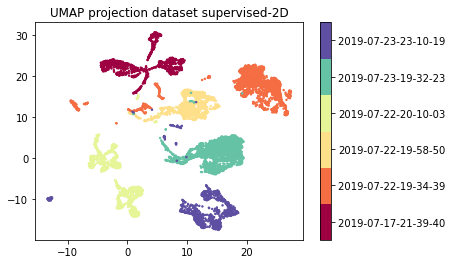

In [83]:
# UMAP clustring supervised
#embedding1 = umap.UMAP(n_neighbors=15,min_dist=0.5,random_state=42).fit_transform(data, y=label)

embedding1= umap.UMAP(n_neighbors=20,min_dist=0.7,random_state=42,n_epochs=350,learning_rate=1).fit_transform(scaled_data,y=label)
plt.scatter(embedding1[:, 0], embedding1[:, 1], c=label, cmap='Spectral', s=2)
#plt.gca().set_aspect('equal', 'datalim')
cbar = plt.colorbar(boundaries=np.arange(7)-0.5)
cbar.set_ticks(np.arange(7))
cbar.set_ticklabels(classes)
plt.title('UMAP projection dataset supervised-2D', fontsize=12);
plt.show()


In [81]:
# Outlier detection by using LOF(Local Outlier Factor) - unsupervised
outlier_scores = sklearn.neighbors.LocalOutlierFactor(contamination='auto').fit_predict(embedding)
outlying_data = data[outlier_scores == -1] # number of outlier points
print(outlying_data.shape)      
result = np.where(outlier_scores == -1) # index of outlier points
print(result)

(0, 121)
(array([], dtype=int64),)


In [84]:
# Outlier detection by using LOF(Local Outlier Factor) - supervised
outlier_scores = sklearn.neighbors.LocalOutlierFactor(contamination='auto').fit_predict(embedding1)
outlying_data = data[outlier_scores == -1]  # number of outlier points
print(outlying_data.shape)               
result = np.where(outlier_scores == -1)  # index of outlier points
print(result)

(68, 121)
(array([  14,  595,  631,  981, 1036, 1115, 1176, 1190, 1203, 1243, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 2731, 2732, 2962, 3870, 3871, 3872, 4049, 4052,
       4053, 4056, 4464, 4484, 4967, 5359, 5360, 6577, 7285, 7544, 7545,
       7557, 7558, 7559, 7619, 7667, 7668, 7688, 7867, 7878, 7880, 7891,
       7892, 7918, 7919, 7951, 8144, 8214, 8226, 8238, 8239, 8299, 8300,
       8303, 8306], dtype=int64),)


In [7]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())



['builtins',
 'builtins',
 'pickle',
 'sklearn',
 'sklearn.cluster',
 'numpy',
 'matplotlib.pyplot',
 'seaborn',
 'pandas',
 'umap',
 'types']

In [12]:
%watermark -p numpy,matplotlib,seaborn,umap,pickle,sklearn,matplotlib,pandas,umap

numpy     : 1.19.2
matplotlib: 3.3.2
seaborn   : 0.11.0
umap      : 0.4.6
pickle    : unknown
sklearn   : 0.23.2
pandas    : 1.1.3

